In [4]:
import numpy as np
from methods import *

In [37]:
def ABM(f, state0, t, steps=5, iters=1, tol=1e-8):
    '''
    returns array of states solved using the Adams-Bashforth-Moulton method

    f ........ function of the ODE: y' = f(t, y)
    state0 ... initial state vector [state0_1, state0_2, ...]
    t ........ discretized time interval [t0, t1, ...]
    steps .... number of interpolation steps per time step
    iters .... number of iterations for each correction-evaluation cycle
    tol ...... if this tolerance is met the correction-evaluation cycle breaks
    '''

    # input processing
    state0 = np.array(state0)
    s = steps if 0 < steps < 5 else 5
    iters = int(iters) if 0 < iters else 1
    N = len(t)
    h = (t[-1] - t[0]) / N

    # initialize state array with initial state
    states = np.zeros((N, 3))
    states[0] = state0

    # initialize ODE function values
    fvals = np.zeros((N, 3))
    fvals[0] = f(t[0], state0)

    # coefficients for Adams-Bashforth method
    coeffsAB = (1,
                [-1/2, 3/2],
                [5/12, -16/12, 23/12],
                [-9/24, 37/24, -59/24, 55/24],
                [251/720, -1274/720, 2616/720, -2774/720, 1901/720])

    # coefficients for Adams-Moulton method
    coeffsAM = (1,
                [1/2, 1/2],
                [-1/12, 2/3, 5/12],
                [1/24, -5/24, 19/24, 9/24],
                [-19/720, 106/720, -264/720, 646/720, 251/720])

    # increasing steps until desired order is reached
    for n in range(s):
        # predictor: Adams-Bashforth method
        states[n+1] = states[n] + h * np.dot(coeffsAB[n], fvals[:n+1])

        # evaluation
        fvals[n+1] = f(t[n+1], states[n+1])

        # correction-evaluation cycle with Adams-Moulton
        for _ in range(iters):
            new = states[n] + h * np.dot(coeffsAM[n], fvals[:n+1])
            cond = np.allclose(states[n+1], new, atol=tol)
            states[n+1] = new
            fvals[n+1] = f(t[n+1], states[n+1])
            if cond:
                break

    # main loop
    for n in range(s, N-1):
        # predictor: Adams-Bashforth method
        states[n+1] = states[n] + h * np.dot(coeffsAB[s-1], fvals[n-s+1:n+1])

        # evaluation
        fvals[n+1] = f(t[n+1], states[n+1])

        # correction-evaluation cycle with Adams-Moulton
        for _ in range(iters):
            new = states[n] + h * np.dot(coeffsAM[s-1], fvals[n-s+2:n+2])
            cond = np.allclose(new, states[n+1], atol=tol)
            states[n+1] = new
            fvals[n+1] = f(t[n+1], states[n+1])
            if cond:
                break

    return states

In [10]:
sigma = 10
rho = 28
beta = 8/3

f = LorenzSystem(sigma, rho, beta)

# Number of Steps

In [36]:
state0 = (1,1,1)
t = np.arange(0,20,0.001)

states1 = ABM(f, state0, t, steps=1)
states2 = ABM(f, state0, t, steps=2)
states3 = ABM(f, state0, t, steps=3)
states4 = ABM(f, state0, t, steps=4)
states5 = ABM(f, state0, t, steps=5)

1
2
3
4
5


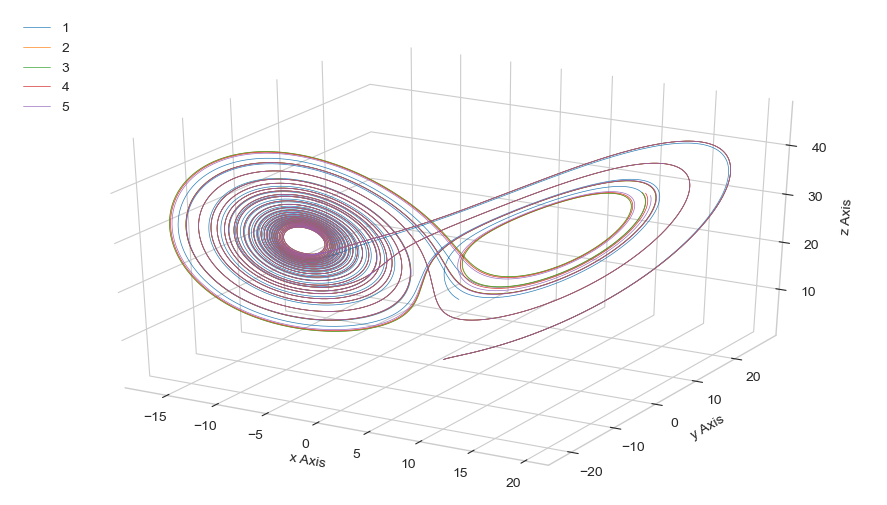

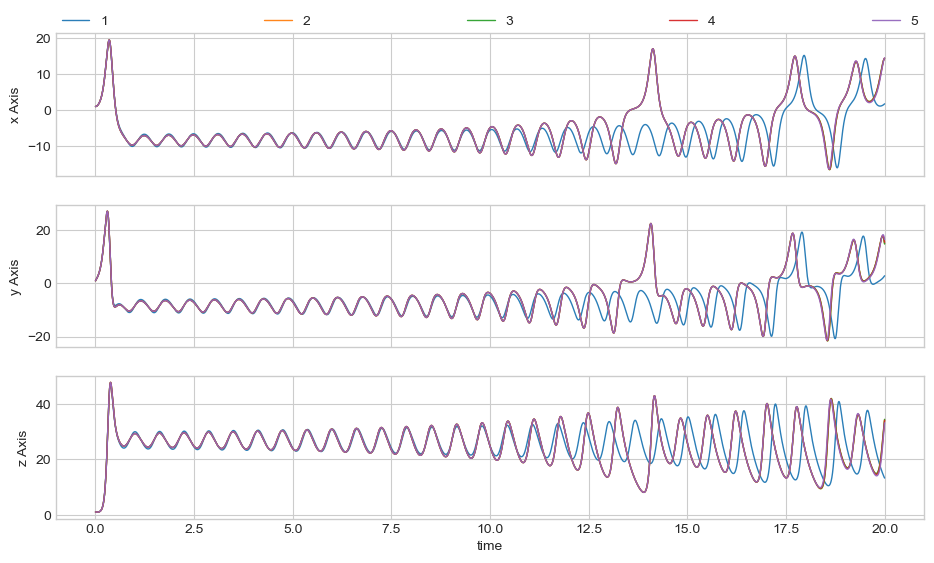

In [34]:
labels=("1", "2", "3", "4", "5")

ParametricPlot(states1, states2, states3, states4, states5, labels=labels)
Plot(t, states1, states2, states3, states4, states5, labels=labels)

In [40]:
h = 0.001
state1 = (1,1,1)
state2 = (0.9, 0.9, 0.9)
t = np.arange(0,20,h)

labels=(f"{state1}", f"{state2}")

def div(states1, states2):
    diffs = np.abs(np.array(states1) - np.array(states2))
    for n, diff in enumerate(diffs):
        if diff[0] > 3 or diff[1] > 5 or diff[2] > 5:
            return n * h

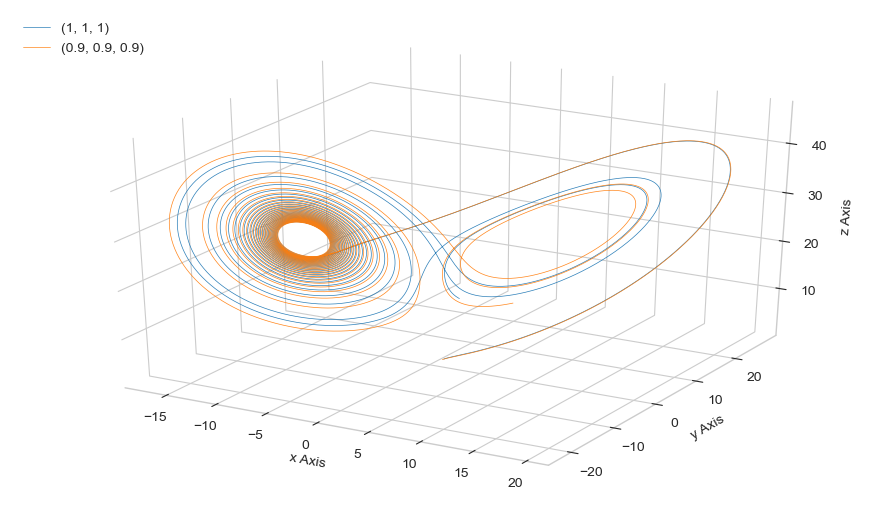

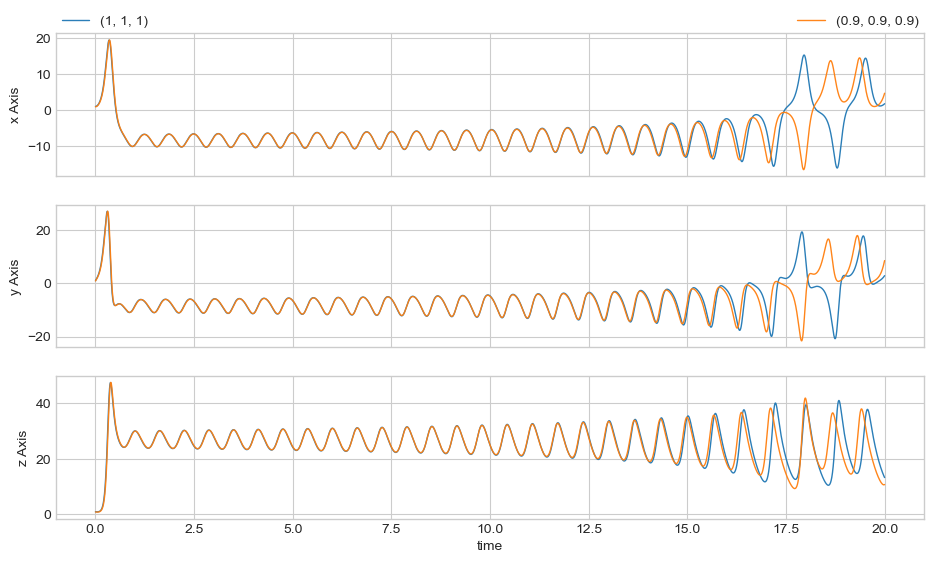

15.556000000000001


In [41]:
# steps = 1

states1 = ABM(f, state1, t, steps=1)
states2 = ABM(f, state2, t, steps=1)

ParametricPlot(states1, states2, labels=labels)
Plot(t, states1, states2, labels=labels)

print(div(states1, states2))

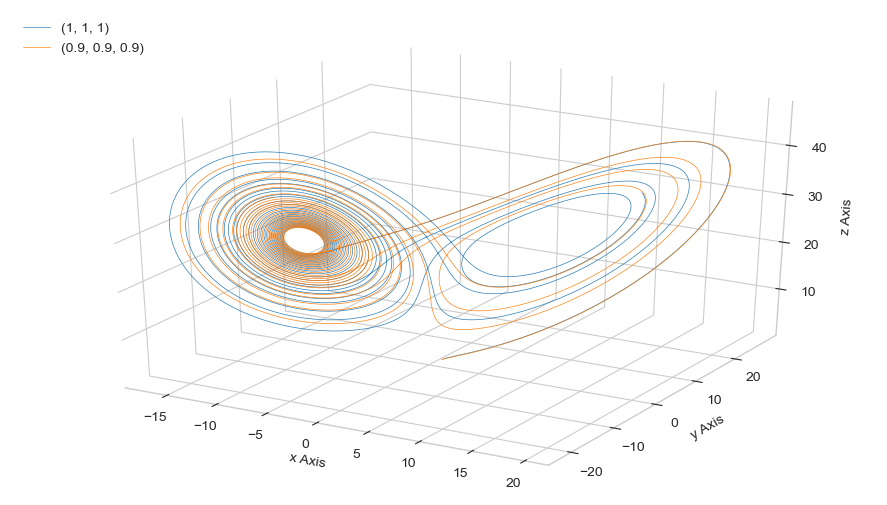

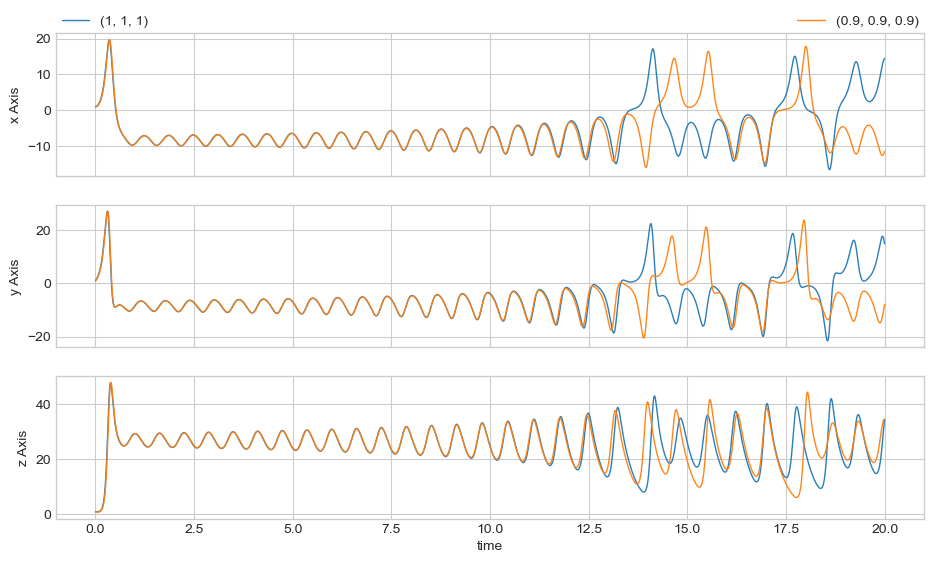

12.98


In [42]:
# steps = 2

states1 = ABM(f, state1, t, steps=2)
states2 = ABM(f, state2, t, steps=2)

ParametricPlot(states1, states2, labels=labels)
Plot(t, states1, states2, labels=labels)

print(div(states1, states2))

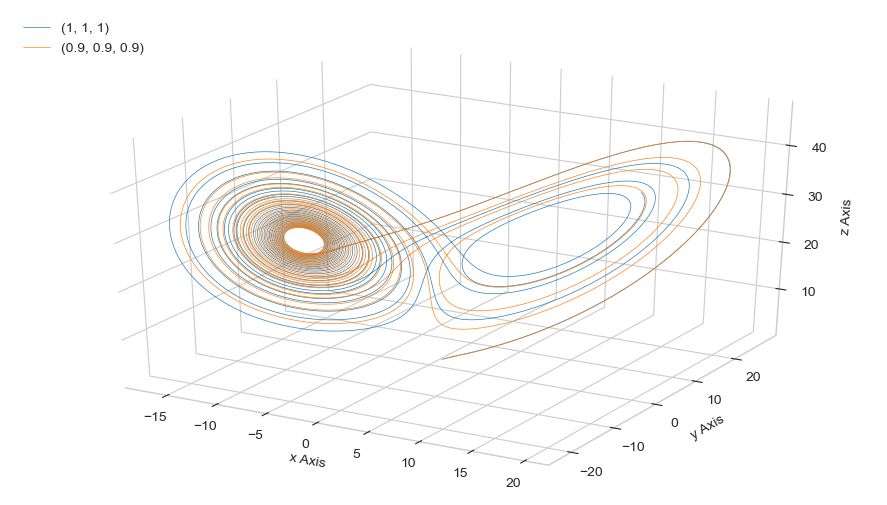

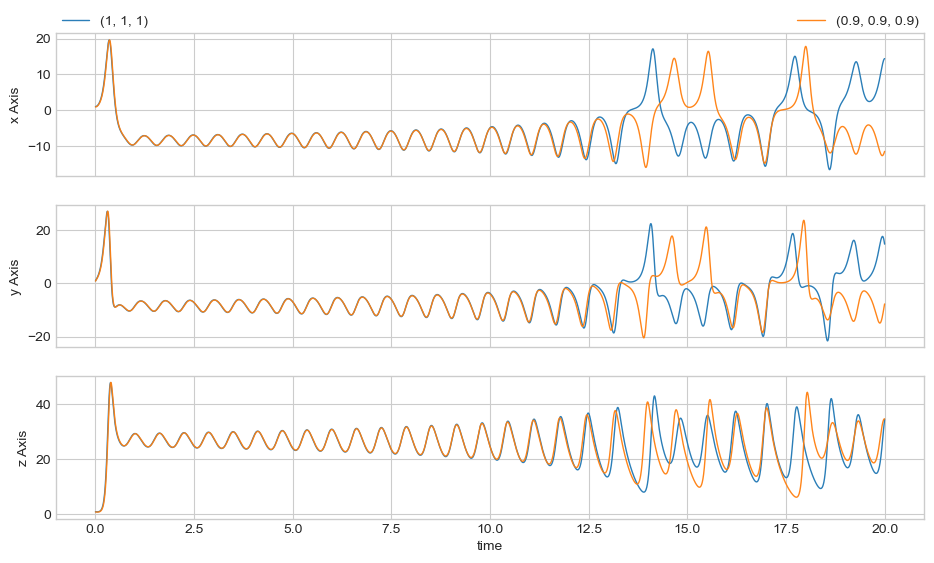

12.98


In [43]:
# steps = 3

states1 = ABM(f, state1, t, steps=3)
states2 = ABM(f, state2, t, steps=3)

ParametricPlot(states1, states2, labels=labels)
Plot(t, states1, states2, labels=labels)

print(div(states1, states2))

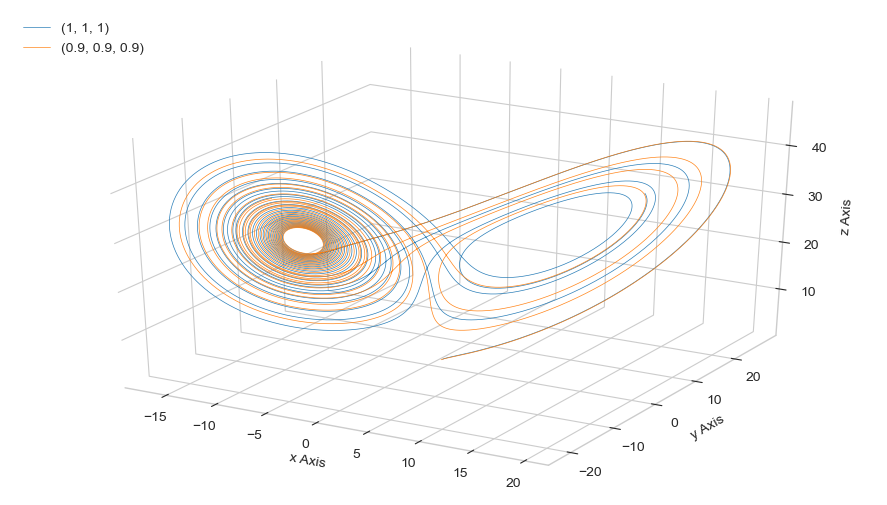

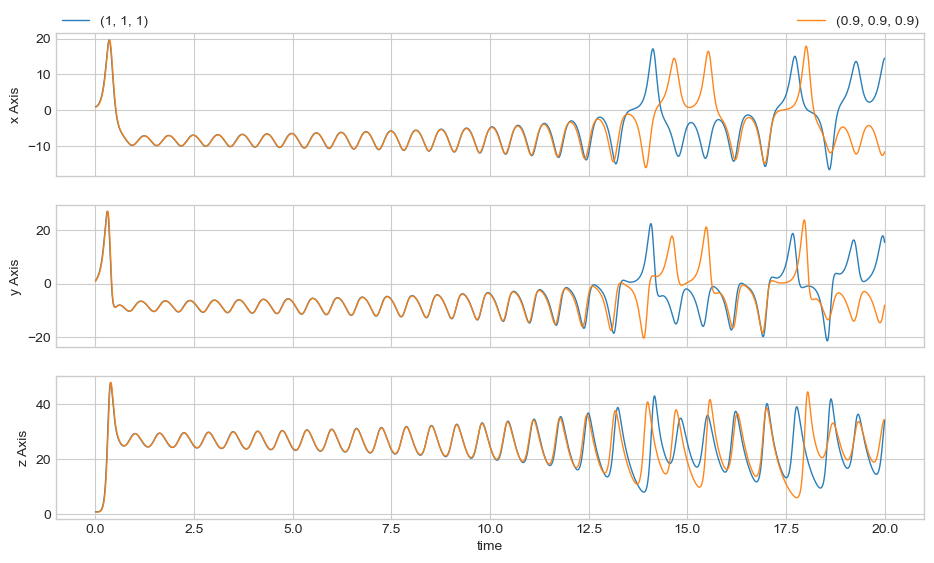

12.98


In [44]:
# steps = 4

states1 = ABM(f, state1, t, steps=4)
states2 = ABM(f, state2, t, steps=4)

ParametricPlot(states1, states2, labels=labels)
Plot(t, states1, states2, labels=labels)

print(div(states1, states2))

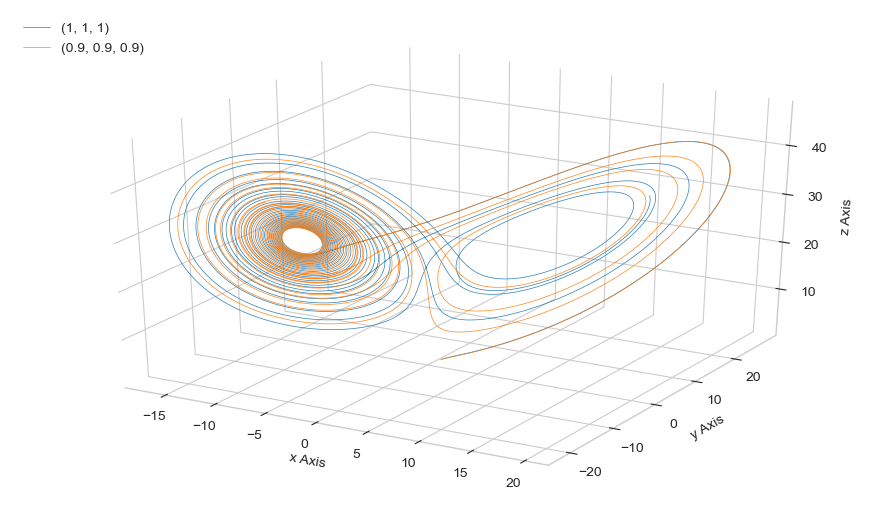

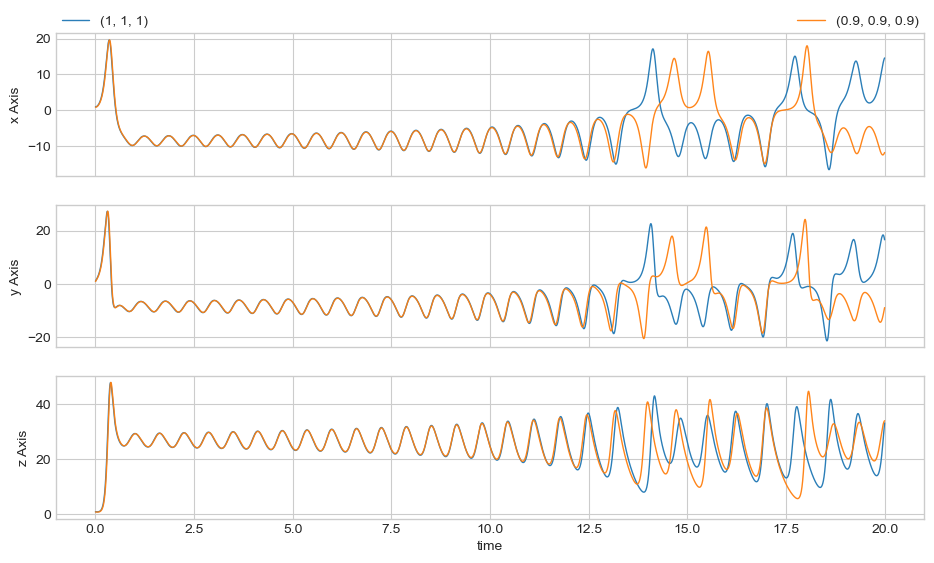

12.98


In [45]:
# steps = 5

states1 = ABM(f, state1, t, steps=5)
states2 = ABM(f, state2, t, steps=5)

ParametricPlot(states1, states2, labels=labels)
Plot(t, states1, states2, labels=labels)

print(div(states1, states2))

# Title Image

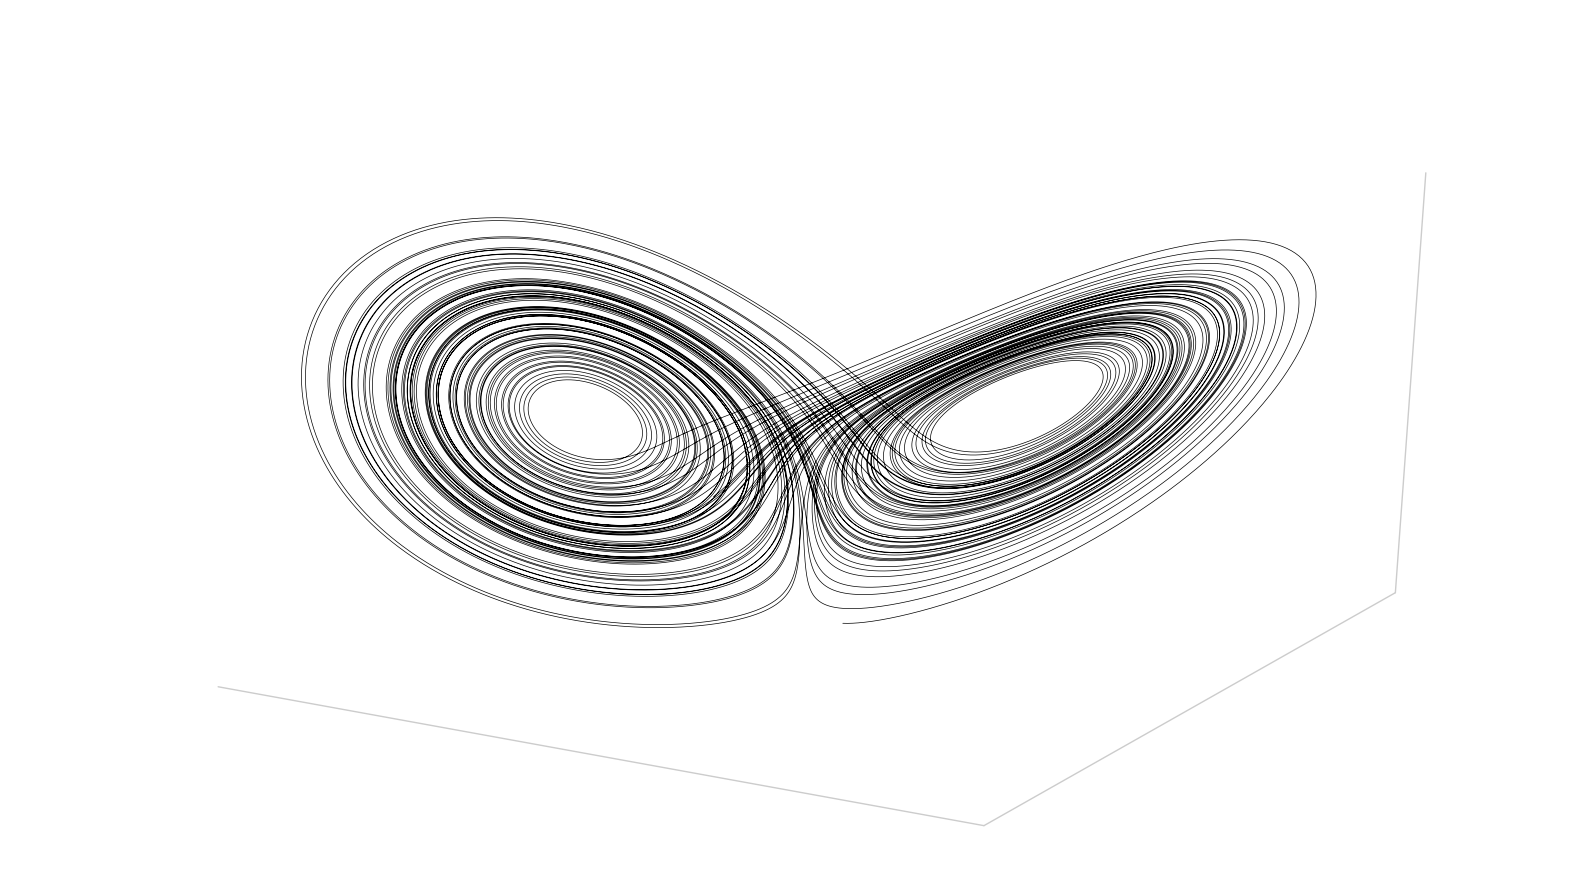

In [38]:
state0 = (1,1,1)
t = np.arange(0,100,0.001)

states = ABM(f, state0, t)

fig = plt.figure(figsize=(16, 9), tight_layout=True)
ax = fig.gca(projection="3d")
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.xaxis.pane.set_edgecolor((1,1,1,0))
ax.yaxis.pane.set_edgecolor((1,1,1,0))
ax.zaxis.pane.set_edgecolor((1,1,1,0))
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.edge = False
ax.yaxis.pane.edge = False
ax.zaxis.pane.edge = False

ax.grid(False)

ax.plot(*states.T, linewidth=0.5, color="black")

fig.savefig("title.png", bbox_inches="tight", pad_inches=0, transparent=True)

plt.show()

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

plt.rcdefaults()
plt.style.use("seaborn-whitegrid")

sigma = 10
rho = 28
beta = 8/3

f = LorenzSystem(sigma, rho, beta)

h = 1/1000

state1 = (1, 1, 1)
state2 = (1+h, 1+h, 1+h)
state3 = (1-h, 1-h, 1-h)

t = np.arange(0, 20, h)

states1 = ABM(f, state1, t)
states2 = ABM(f, state2, t)
states3 = ABM(f, state3, t)

labels = (f"Startwert {state1}", f"Startwert {state2}", f"Startwert {state3}")

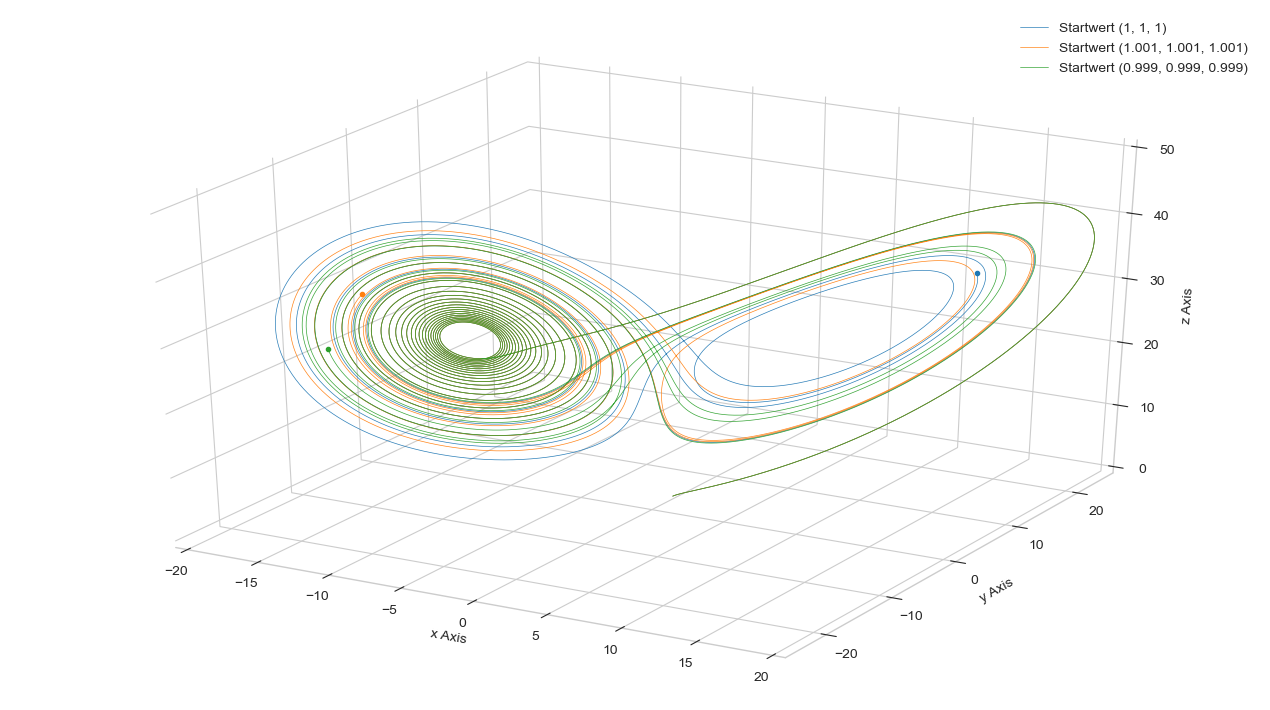

In [5]:
fig = plt.figure(figsize=(12.8, 7.2), tight_layout=True)
ax = fig.gca(projection="3d")

ax.w_xaxis.pane.set_color("w")
ax.w_yaxis.pane.set_color("w")
ax.w_zaxis.pane.set_color("w")
ax.set_xlabel("x Axis")
ax.set_ylabel("y Axis")
ax.set_zlabel("z Axis")
ax.set_xlim3d([-20, 20])
ax.set_ylim3d([-25, 25])
ax.set_zlim3d([0, 50])

lines = (
    ax.plot(states1[0:1, 0], states1[0:1, 1], states1[0:1, 2], color=f"C0", linewidth=0.5, alpha=0.95)[0],
    ax.plot(states2[0:1, 0], states2[0:1, 1], states2[0:1, 2], color=f"C1", linewidth=0.5, alpha=0.95)[0],
    ax.plot(states3[0:1, 0], states3[0:1, 1], states3[0:1, 2], color=f"C2", linewidth=0.5, alpha=0.95)[0]
)
points = (
    ax.plot(states1[0:1, 0], states1[0:1, 1], states1[0:1, 2], ".", color=f"C0")[0],
    ax.plot(states2[0:1, 0], states2[0:1, 1], states2[0:1, 2], ".", color=f"C1")[0],
    ax.plot(states3[0:1, 0], states3[0:1, 1], states3[0:1, 2], ".", color=f"C2")[0]
)

def update(i):
    lines[0].set_data(states1.T[:2, :i])
    lines[0].set_3d_properties(states1.T[2, :i])
    points[0].set_data(states1[i, :2])
    points[0].set_3d_properties(states1[i, 2])

    lines[1].set_data(states2.T[:2, :i])
    lines[1].set_3d_properties(states2.T[2, :i])
    points[1].set_data(states2[i, :2])
    points[1].set_3d_properties(states2[i, 2])

    lines[2].set_data(states3.T[:2, :i])
    lines[2].set_3d_properties(states3.T[2, :i])
    points[2].set_data(states3[i, :2])
    points[2].set_3d_properties(states3[i, 2])

    return (*lines, *points)

ax.legend(lines, labels)

anim = FuncAnimation(fig, update, frames=len(states1), interval=1, blit=True)
anim.save("anim.mp4", bitrate=10000)

### Schrittweitensensitivität

In [2]:
sigma = 10
rho = 28
beta = 8/3

f = LorenzSystem(sigma, rho, beta)

state0 = (1, 1, 1)

t1 = np.arange(0, 20, 1/100)
t2 = np.arange(0, 20, 1/200)
t3 = np.arange(0, 20, 1/1000)

states1 = ABM(f, state0, t1)
states2 = ABM(f, state0, t2)
states3 = ABM(f, state0, t3)

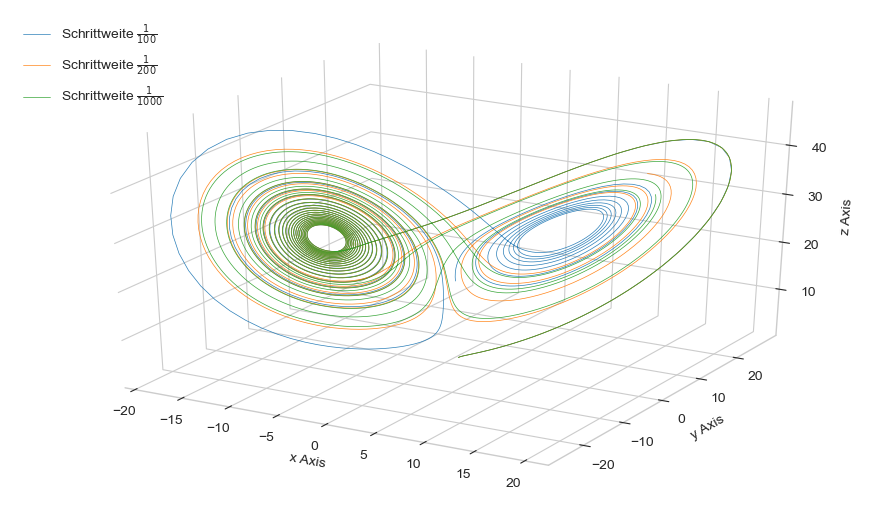

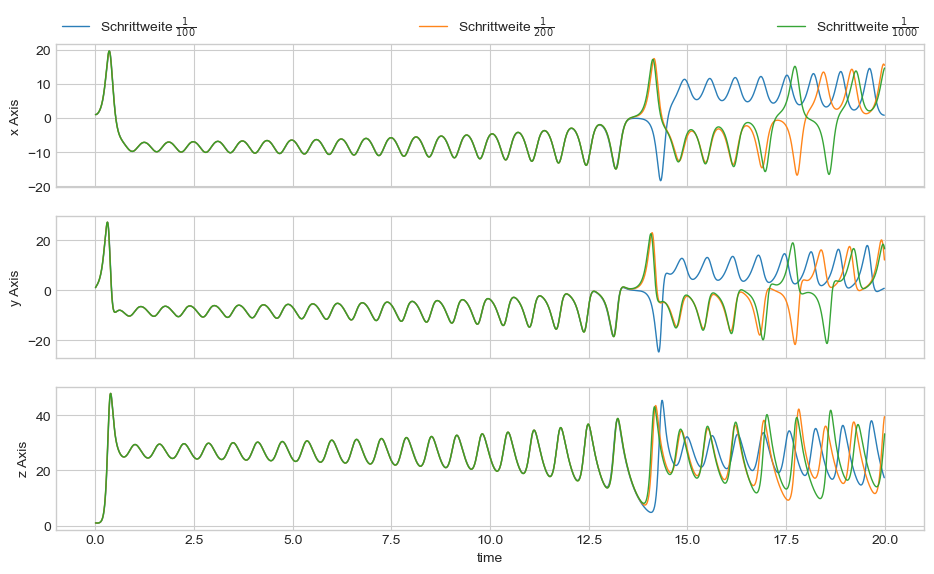

In [3]:
labels = (r"Schrittweite $\frac{1}{100}$", r"Schrittweite $\frac{1}{200}$", r"Schrittweite $\frac{1}{1000}$")

ParametricPlot(states1, states2, states3, labels=labels, fname="PC_stepsize_paramplot.png")
Plot((t1, t2, t3), states1, states2, states3, labels=labels, sameAxis=False, fname="PC_stepsize_compplot.png")

In [4]:
Animate(states1, states2, states3, hs=(1/100, 1/200, 1/1000))

### Chaos

In [8]:
sigma = 10
rho = 28
beta = 8/3

f = LorenzSystem(sigma, rho, beta)

h = 1/1000

state1 = (1, 1, 1)
state2 = (1+h, 1+h, 1+h)
state3 = (1-h, 1-h, 1-h)

t = np.arange(0, 20, h)

states1 = ABM(f, state1, t)
states2 = ABM(f, state2, t)
states3 = ABM(f, state3, t)

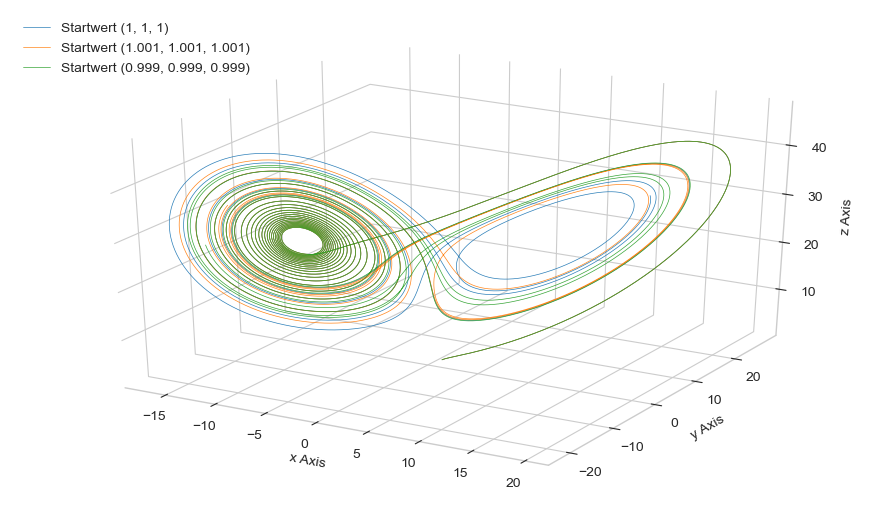

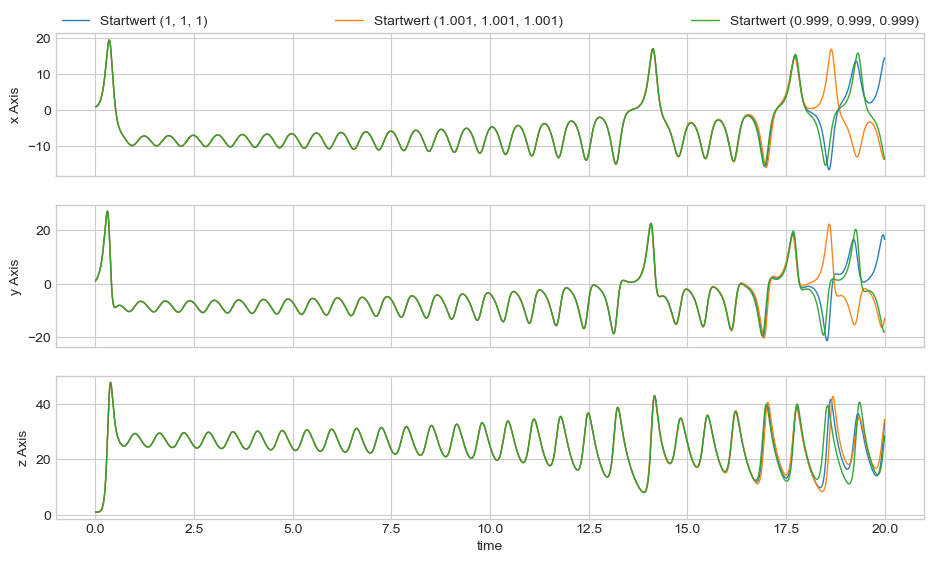

In [9]:
labels = (f"Startwert {state1}", f"Startwert {state2}", f"Startwert {state3}")

ParametricPlot(states1, states2, states3, labels=labels)
Plot(t, states1, states2, states3, labels=labels)

### Datenexport

In [18]:
sigma = 10
rho = 28
beta = 8/3

f = LorenzSystem(sigma, rho, beta)

h = 1/100
t = np.arange(0, 50, h)
state1 = (1, 1, 1)

data = ABM(f, state1, t)

#np.savetxt("PC_data.txt", data, fmt="%.16f", delimiter=",", newline="),\n(")

### $\rho$

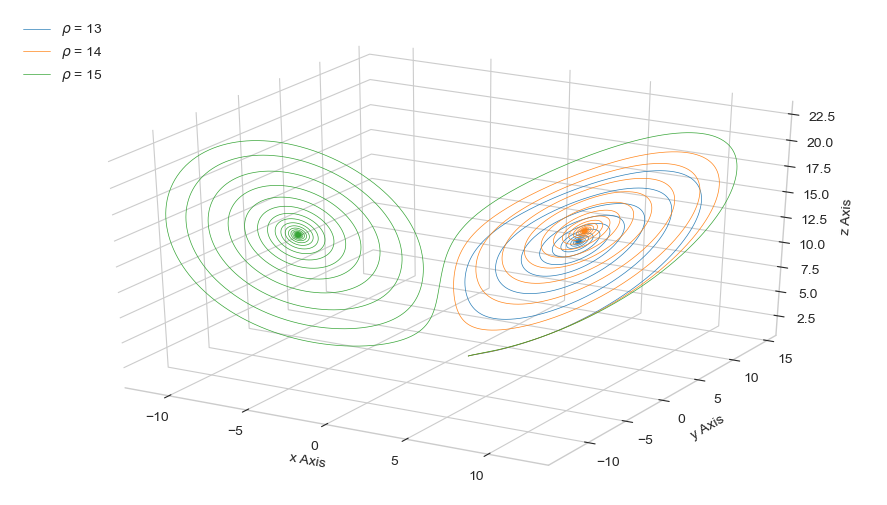

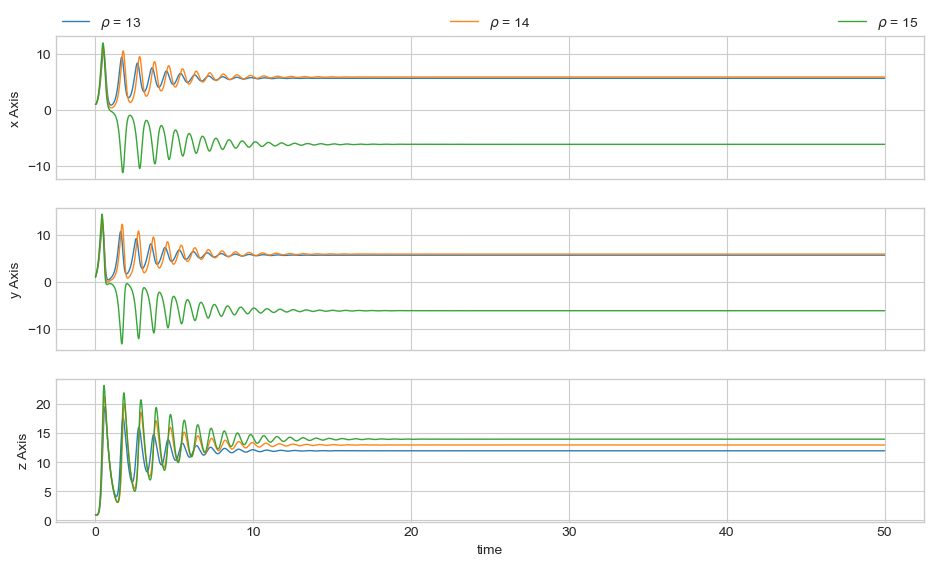

In [47]:
sigma = 10
beta = 8/3

rho1 = 13
rho2 = 14
rho3 = 15

f1 = LorenzSystem(sigma, rho1, beta)
f2 = LorenzSystem(sigma, rho2, beta)
f3 = LorenzSystem(sigma, rho3, beta)

state0 = (1, 1 ,1)
t = np.arange(0, 50, 1/1000)

states1 = ABM(f1, state0, t)
states2 = ABM(f2, state0, t)
states3 = ABM(f3, state0, t)

labels = (fr"$\rho$ = {rho1}", fr"$\rho$ = {rho2}", fr"$\rho$ = {rho3}")

ParametricPlot(states1, states2, states3, labels=labels, fname="PC_stablerho_param.png")
Plot(t, states1, states2, states3, labels=labels, fname="PC_stablerho_comp.png")

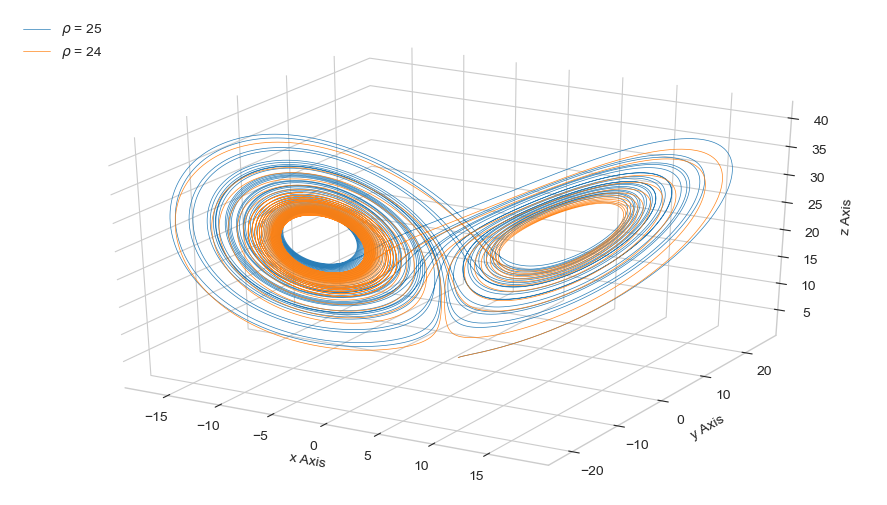

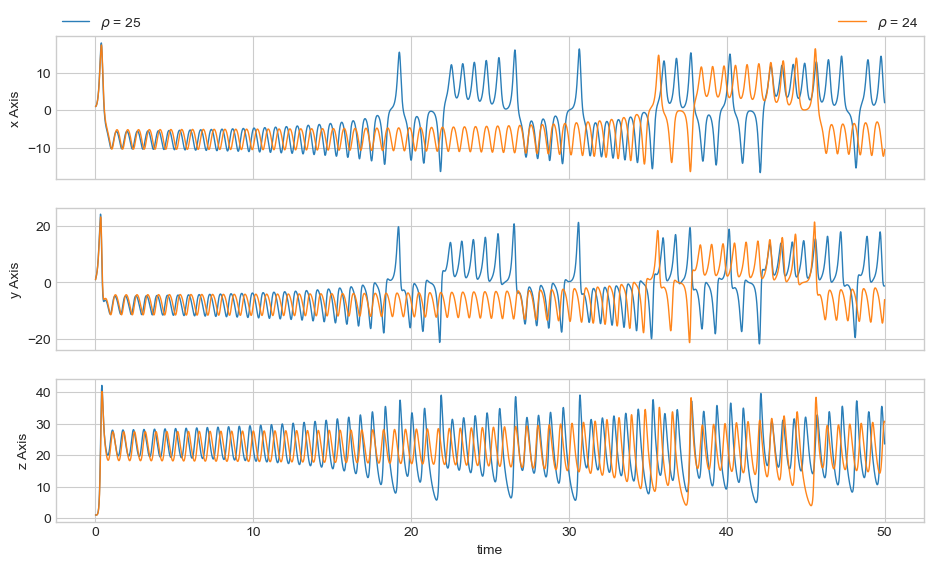

In [28]:
sigma = 10
beta = 8/3

rho1 = 25
rho2 = 24

f1 = LorenzSystem(sigma, rho1, beta)
f2 = LorenzSystem(sigma, rho2, beta)

state0 = (1, 1 ,1)
t = np.arange(0, 50, 1/1000)

states1 = ABM(f1, state0, t)
states2 = ABM(f2, state0, t)

labels = (fr"$\rho$ = {rho1}", fr"$\rho$ = {rho2}")

ParametricPlot(states1, states2, labels=labels)
Plot(t, states1, states2, labels=labels)

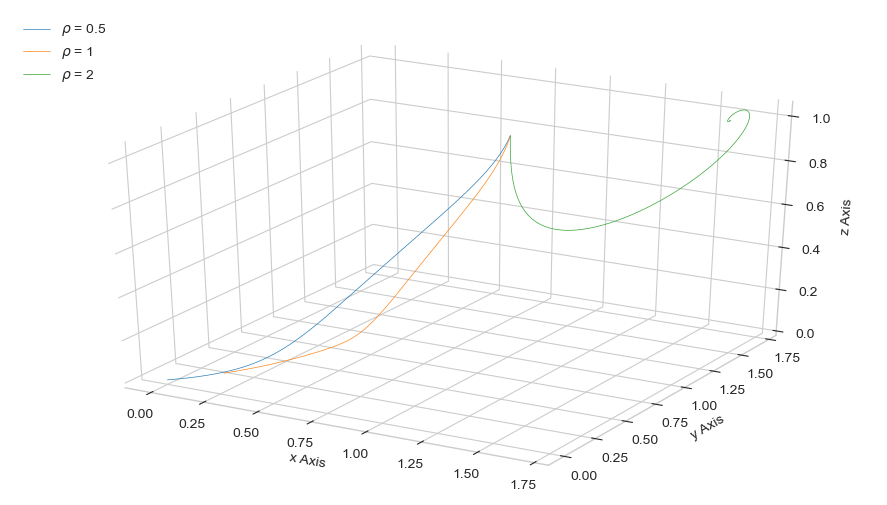

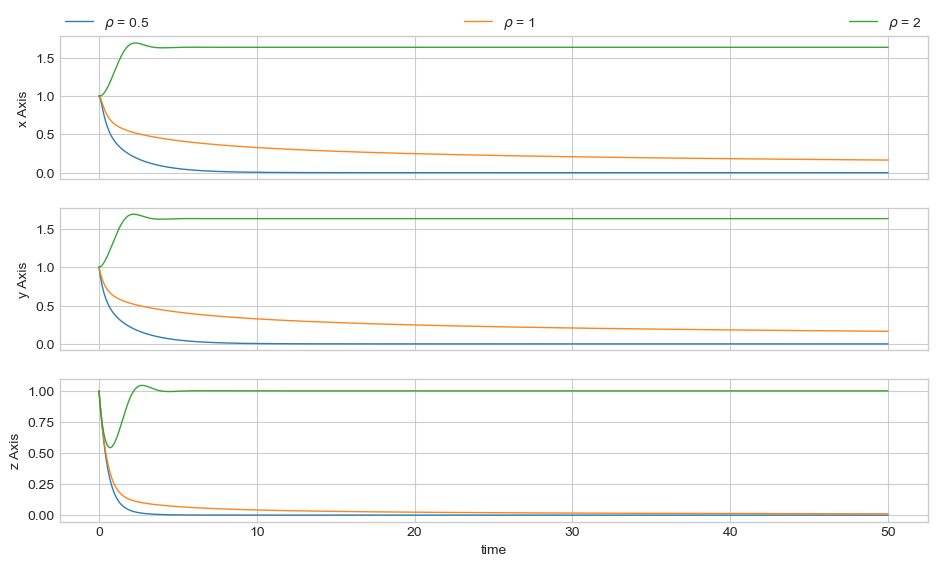

In [45]:
sigma = 10
beta = 8/3

rho1 = 0.5
rho2 = 1
rho3 = 2

f1 = LorenzSystem(sigma, rho1, beta)
f2 = LorenzSystem(sigma, rho2, beta)
f3 = LorenzSystem(sigma, rho3, beta)

state0 = (1, 1 ,1)
t = np.arange(0, 50, 1/1000)

states1 = ABM(f1, state0, t)
states2 = ABM(f2, state0, t)
states3 = ABM(f3, state0, t)

labels = (fr"$\rho$ = {rho1}", fr"$\rho$ = {rho2}", fr"$\rho$ = {rho3}")

ParametricPlot(states1, states2, states3, labels=labels, fname="PC_smallrho_param.png")
Plot(t, states1, states2, states3, labels=labels)

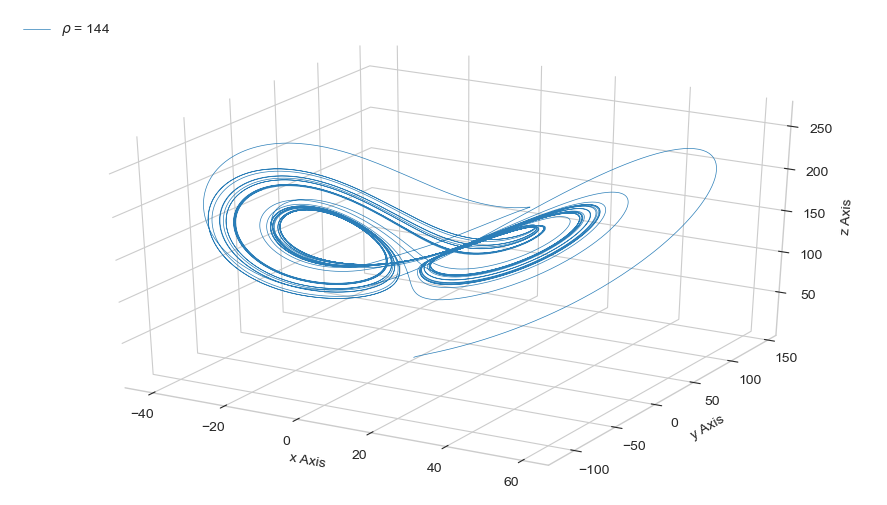

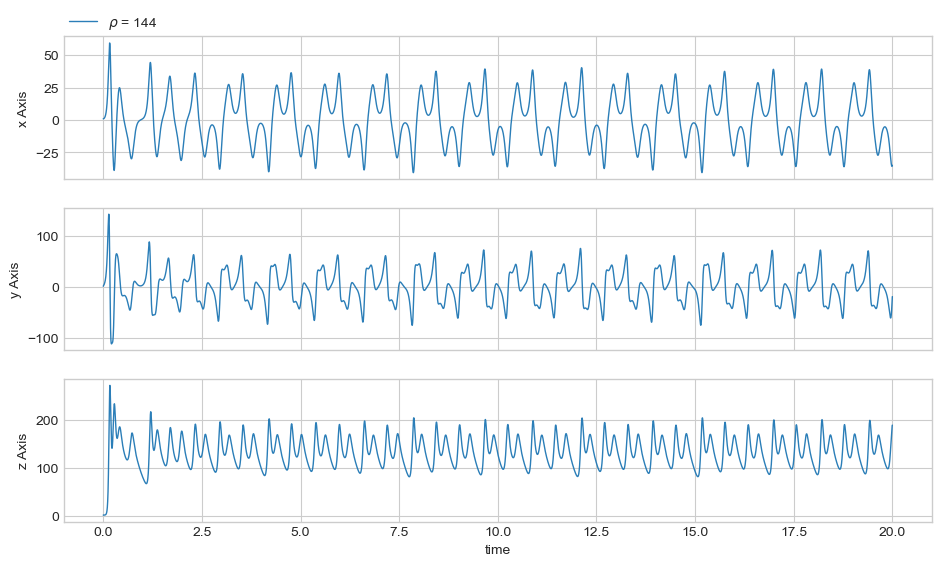

In [46]:
sigma = 10
rho = 144
beta = 8/3

f = LorenzSystem(sigma, rho, beta)

state0 = (1, 1 ,1)
t = np.arange(0, 20, 1/1000)

states = ABM(f, state0, t)

labels = (fr"$\rho$ = {rho}",)

ParametricPlot(states, labels=labels, fname="PC_doublerho_param.png")
Plot(t, states, labels=labels, fname="PC_doublerho_comp.png")

In [10]:
with open("1d100.txt", "r") as file:
    states100 = np.array(eval(file.read()))

In [11]:
with open("1d200.txt", "r") as file:
    states200 = np.array(eval(file.read()))

In [12]:
with open("1d1000.txt", "r") as file:
    states1000 = np.array(eval(file.read()))

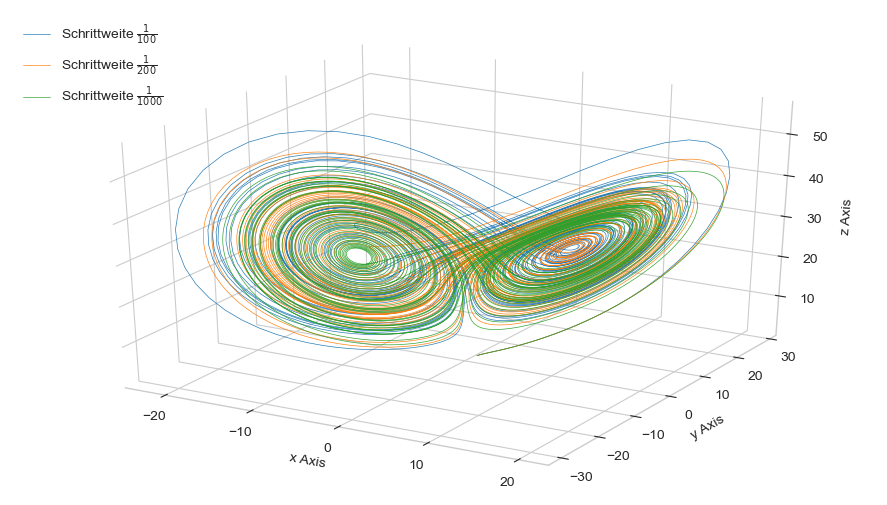

In [21]:
labels = (r"Schrittweite $\frac{1}{100}$", r"Schrittweite $\frac{1}{200}$", r"Schrittweite $\frac{1}{1000}$")
ParametricPlot(states100, states200, states1000, labels=labels, fname="RK_stepsize_param.png")